
**Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

**Edición 2022**

---
## Trabajo práctico entregable - Parte 1


Grupo 32

Integrantes:

Garay, Carolina del Valle
Ormaechea, Sebastián Gabriel
Ramos, Pablo Nicolás
Reviglio, Valentín
Siner, Magalí
Introducción:

En el presente documento se exploran y analizan los resultados de la encuesta de salarios 2020 de sysarmy, a fin de tratar los siguientes interrogantes:

¿Cuáles son los lenguajes de programación asociados a los mejores salarios?

¿Que herramientas (prácticas y teóricas) son útiles para explorar la base, descubrir patrones, asociaciones?

# Exploración de la base de datos
**Importación de librerías necesarias**

In [ ]:
import io
import matplotlib
import matplotlib.pyplot as plt
import numpy
import pandas as pd
import seaborn as sns 

sns.set_context('talk')

## Lectura del dataset

En la notebook 00 se explican los detalles de la siguiente sección.

In [ ]:
url = 'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/sysarmy_survey_2020_processed.csv'
df = pd.read_csv(url)
df.shape

(6095, 48)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6095 entries, 0 to 6094
Data columns (total 48 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   profile_gender                                6095 non-null   object 
 1   profile_age                                   6095 non-null   int64  
 2   work_country                                  6095 non-null   object 
 3   work_province                                 6095 non-null   object 
 4   profile_years_experience                      6095 non-null   float64
 5   work_years_in_company                         6095 non-null   float64
 6   work_years_in_current_position                6095 non-null   float64
 7   work_people_in_charge_of                      6095 non-null   int64  
 8   profile_studies_level                         6095 non-null   object 
 9   profile_studies_level_state                   6095 non-null   o

In [ ]:
df.describe()

,profile_age,profile_years_experience,work_years_in_company,work_years_in_current_position,work_people_in_charge_of,salary_on_call_duty_charge,salary_monthly_BRUTO,salary_monthly_NETO,salary_satisfaction,salary_comparison_last_semester,salary_percentage_inflation_adjustment_2020,salary_month_last_inflation_adjustment,company_recommended,company_diversity_policies
count,6095.000000,6095.000000,6095.000000,6095.000000,6095.000000,6095.000000,6.095000e+03,5.883000e+03,6095.000000,6095.000000,6095.000000,6095.000000,6095.000000,6095.000000
mean,41.181952,8.930861,3.311944,2.889770,2.211649,664.042084,1.240585e+05,9.490795e+04,2.619524,2.363577,10.444511,2.785562,7.340115,7.621001
std,665.721175,7.161094,4.367742,3.423228,32.983395,10540.523461,1.229124e+05,9.686226e+04,0.858621,0.945713,12.860433,2.837195,2.024057,2.324034
min,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000e+00,1.000000e+00,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
25%,27.000000,3.000000,0.000000,1.000000,0.000000,0.000000,6.159500e+04,5.148000e+04,2.000000,2.000000,0.000000,0.000000,6.000000,6.000000
50%,31.000000,7.000000,2.000000,2.000000,0.000000,0.000000,9.600000e+04,7.800000e+04,3.000000,2.000000,7.000000,2.000000,8.000000,8.000000
75%,37.000000,13.000000,4.000000,4.000000,0.000000,0.000000,1.450000e+05,1.060000e+05,3.000000,3.000000,18.000000,6.000000,9.000000,10.000000
max,52000.000000,115.000000,43.000000,34.000000,2500.000000,650000.000000,2.180000e+06,2.080000e+06,4.000000,4.000000,100.000000,8.000000,10.000000,10.000000


In [ ]:
# view column names
df.columns

Index(['profile_gender', 'profile_age', 'work_country', 'work_province',
       'profile_years_experience', 'work_years_in_company',
       'work_years_in_current_position', 'work_people_in_charge_of',
       'profile_studies_level', 'profile_studies_level_state',
       'profile_career', 'profile_university',
       'profile_specialization_courses', 'profile_open_source_contributions',
       'profile_programming_as_hobby', 'work_role', 'tools_platform',
       'tools_programming_languages', 'tools_frameworks', 'tools_data_bases',
       'tools_qa_testing', 'tools_IDEs', 'tools_work_pc_os',
       'tools_cellphone_os', 'work_on_call_duty', 'salary_on_call_duty_charge',
       'work_on_call_duty_charge_type', 'work_contract_type',
       'salary_monthly_BRUTO', 'salary_monthly_NETO', 'salary_in_usd',
       'salary_satisfaction', 'salary_comparison_last_semester',
       'salary_has_bonus', 'salary_bonus_tied_to',
       'salary_inflation_adjustment_2020',
       'salary_percentage_inf

In [ ]:
# check for missing values
df.isnull().sum()

profile_gender                                     0
profile_age                                        0
work_country                                       0
work_province                                      0
profile_years_experience                           0
work_years_in_company                              0
work_years_in_current_position                     0
work_people_in_charge_of                           0
profile_studies_level                              0
profile_studies_level_state                        0
profile_career                                   299
profile_university                               534
profile_specialization_courses                     0
profile_open_source_contributions                  0
profile_programming_as_hobby                       0
work_role                                          0
tools_platform                                     2
tools_programming_languages                        1
tools_frameworks                              

Seleccionamos las siguientes variables como relevantes:

Variable RESPUESTA:

- Salario mensual neto :'salary_monthly_NETO'. Tipo: cuantitativa

Variables EXPLICATIVAS:

- Lenguajes de programación utilizados: 'tools_programming_languages'. Tipo: categórica

- Nivel de estudios: 'profile_studies_level'. Tipo: categórica

- Años de experiencia: 'profile_years_experience'. Tipo: cuantitativa

- Rol de trabajo: 'work_role'. Tipo: categórica

- Tipo de contrato de trabajo: 'work_contract_type'. Tipo: categórica 

*Nota: El tipo de variable se corroboró mediante la inspección de la columna con el método "df["column_name"].unique()"

# Selección de las filas relevantes para los análisis.

In [ ]:
salary_COL = 'salary_monthly_NETO'

# Cálculo de medidas de centralización
max_salario = df[salary_COL].max()
mean_salario = df[salary_COL].mean()
med_salario = df[salary_COL].median()
mod_salario = df[salary_COL].mode()

print("Salario máximo NETO:", str(max_salario), "$ARS")
print("Media del salario NETO:", str(mean_salario),"$ARS") 
print("Mediana del salario NETO:", str(med_salario), "$ARS")
print("Moda del salario NETO:", str(mod_salario),"$ARS") 

Salario máximo NETO: 2080000.0 $ARS
Media del salario NETO: 94907.9491018188 $ARS
Mediana del salario NETO: 78000.0 $ARS
Moda del salario NETO: 0    80000.0
dtype: float64 $ARS


In [ ]:
# Cálculo de frecuencias para diferentes salarios y rangos de salario
salary_list = [80000, 100000, 200000]
salaries_list = [60000, 70000, 80000, 90000, 100000, 200000, 300000, 400000, 500000, 600000, 700000, 800000, 900000, 1000000]

for s in salary_list:
  print(f"Cantidad de personas con salarios igual a {str(s)} $ARS: ",len(df[df[salary_COL]==float(s)]))

for i in range (len(salaries_list) - 1):
  print(f"Cantidad de personas con salarios entre {str(salaries_list[i])} y {str(salaries_list[i+1])} $ARS:", len(df[(df[salary_COL] > float(salaries_list[i])) & (df[salary_COL] <= float(salaries_list[i+1]))]))

Cantidad de personas con salarios igual a 80000 $ARS:  149
Cantidad de personas con salarios igual a 100000 $ARS:  139
Cantidad de personas con salarios igual a 200000 $ARS:  41
Cantidad de personas con salarios entre 60000 y 70000 $ARS: 561
Cantidad de personas con salarios entre 70000 y 80000 $ARS: 621
Cantidad de personas con salarios entre 80000 y 90000 $ARS: 542
Cantidad de personas con salarios entre 90000 y 100000 $ARS: 514
Cantidad de personas con salarios entre 100000 y 200000 $ARS: 1341
Cantidad de personas con salarios entre 200000 y 300000 $ARS: 154
Cantidad de personas con salarios entre 300000 y 400000 $ARS: 73
Cantidad de personas con salarios entre 400000 y 500000 $ARS: 41
Cantidad de personas con salarios entre 500000 y 600000 $ARS: 17
Cantidad de personas con salarios entre 600000 y 700000 $ARS: 5
Cantidad de personas con salarios entre 700000 y 800000 $ARS: 6
Cantidad de personas con salarios entre 800000 y 900000 $ARS: 7
Cantidad de personas con salarios entre 90000

Considerando la distribución de salarios, se decidió filtrar la base de datos mediante un valor mínimo y un valor máximo.

El valor mínimo se estableció en 50.854 $ARS que corresponde a la Canasta Básica Total (CBT) en diciembre de 2020 (Fte:INDEC). Se considera que valores por debajo de la CBT posiblemente correspondan a trabajos part-time o ad-honorem, los cuales no nos interesa que se incorporen al análisis. En el apéndice se desarrolla un breve análisis de los contratos part_time.

El valor máximo se estableció en 508.540 ARS, correspondiente a 10 CBT. Este valor parece adecuado considerando que en el análisis previo se observa una fuerte caída en la cantidad de entrevistados a partir de salarios de 500.000 $ARS. Cabe comentar que el valor máximo corresponde al cuartil de 75% mas 8 veces el intercuartil.

In [ ]:
#seaborn.pairplot(data=df, y_vars=['salary_monthly_BRUTO'],
                 #x_vars=['salary_monthly_NETO'],
                 #aspect=2, height=4)

#plt.xticks(rotation=20)

In [ ]:
# MAX_AGE = 99

# df_limpio = df.copy()

#df_limpio = df_limpio[df_limpio['salary_monthly_NETO'].notna()]
# df_limpio = df_limpio[df_limpio['salary_monthly_BRUTO'].notna()]
#df_limpio = df_limpio[df_limpio['salary_monthly_BRUTO'] >= df_limpio['salary_monthly_NETO']]

#df_limpio = df_limpio[df_limpio['salary_monthly_NETO'] >= 50854]

#df_limpio = df_limpio[df_limpio.profile_age < MAX_AGE]

#def remove_outliers(df, column_name):
  #q1 = df[column_name].quantile(0.25)
  #q3 = df[column_name].quantile(0.75)
  #iqr = q3 - q1 #Interquartile range
  #fence_low  = q1 - 1.5 * iqr
  #fence_high = q3 + 1.5 * iqr
  #df = df.loc[(df[column_name] > fence_low) & (df[column_name] < fence_high)]
  #df = df.reset_index(drop=True)

  #return df

#df_limpio = remove_outliers(df_limpio, 'salary_monthly_BRUTO')
#df_limpio = remove_outliers(df_limpio, 'salary_monthly_NETO')
#print(len(df_limpio.index))

# df_limpio = df_limpio[(df_limpio.profile_age < max_age) & (df_limpio.salary_monthly_BRUTO <950000)& (df_limpio.salary_monthly_NETO <950000)]

#seaborn.pairplot(data=df_limpio, y_vars=['salary_monthly_BRUTO'],
                 #x_vars=['salary_monthly_NETO'],
                 #aspect=2, height=4)

#plt.xticks(rotation=20)

In [ ]:
#mediana_bruto = df_limpio['salary_monthly_BRUTO'].median()
#media_bruto = df_limpio['salary_monthly_BRUTO'].mean()

#mediana_neto = df_limpio['salary_monthly_NETO'].median()
#media_neto = df_limpio['salary_monthly_NETO'].mean()

#print(f"La mediana del salario bruto es {mediana_bruto} y la media es {media_bruto}")
#print(f"La mediana del salario neto es {mediana_neto} y la media es {media_neto}")

In [ ]:
#import numpy as np 

#matcov=np.cov(df_limpio.salary_monthly_BRUTO,df_limpio.salary_monthly_NETO)
#print('matriz de varianza covarianza:','\n',matcov,'\n')

#corr=np.corrcoef(df_limpio.salary_monthly_BRUTO,df_limpio.salary_monthly_NETO)
#print('matriz de correlaciones: \n ', corr,'\n')

#print('correlación entra ambas variables: ',corr[0,1],'\n')

# Ejercicio 1 - Análisis descriptivo

Responder a la pregunta: **¿Cuáles son los lenguajes de programación asociados a los mejores salarios?**

Para ello:
1. Seleccionar las columnas relevantes para analizar.
2. Seleccionar las filas relevantes para analizar. Esto incluye la eliminación de valores extremos y erróneos, pero también puede enfocar el análisis en una sub-población. Por ejemplo, se pueden limitar a personas con un salario mayor que 10000 pesos, o a las personas que trabajan sólo en "Data Science", pero deben justificar su elección y reformular la pregunta inicial de ser necesario.
  * Obtener una lista de los lenguajes de programación más populares. Decidir cuántos y cuáles seleccionan para incluir en el análisis.
  * Para cada una de las otras columnas del punto anterior, elegir los rangos o valores seleccionan para incluir en el análisis.
3. Seleccionar métricas que ayuden a responder la pregunta, y los métodos para analizarlas. Elegir UNA de las siguientes opciones:
  * Comparar las distribuciones de salario para cada lenguaje utilizando visualizaciones. Como la visualización es el producto final, debe ser clara y mostrar información relevante.
  * Comparar medidas de estadística descriptiva sobre la distribución de salario para cada lenguaje. Sean creativos, la estadística descriptiva nos permite decir cosas como: "el 10% de los mejores sueldos los ganan, en su mayoría, programadores que saben kotlin!" (donde *mayoría* es un término medio engañoso que sólo significa más del 50%). Para comparar múltiples lenguajes, les recomendamos usar también visualizaciones.
  * Comparar probabilidades. Por ejemplo: "Si sabés Python o Java, tenés un 30% más de chances de ganar arriba de 100K".

Si lo consideran necesario, realicen varias iteraciones. Es decir, si encuentran que las distribuciones de los lenguajes de programación que seleccionaron inicialmente no son muy diferentes, pueden re-hacer el análisis usando sólo los lenguajes de programación que son diferentes.

In [ ]:
# complete here if you want to include more columns
# relevant_columns = ['tools_programming_languages', 'salary_monthly_NETO', 'salary_monthly_BRUTO']

# function that copy a new dataframe and delete NaN Values
def clean_dataframe(df, salary_COL):
  # Copy the dataframe, this way you make sure you don't modify the original dataframe
  df = df.copy()
  # Stay with records greater than the basic basket
  df = df[df[salary_COL] >= 50854]
  # Delete NULL values
  df = df[df[salary_COL].notna()]
  # Delete repeated rows
  # df = df.drop_duplicates(keep="last")
  # Remove outliers
  q1 = df[salary_COL].quantile(0.25)
  q3 = df[salary_COL].quantile(0.75)
  iqr = q3 - q1 #Interquartile range
  fence_low  = q1 - 1.5 * iqr
  fence_high = q3 + 1.5 * iqr
  df = df.loc[(df[salary_COL] > fence_low) & (df[salary_COL] < fence_high)]
  # Reset the index
  df = df.reset_index(drop=True)
  # Convierto variables cualitativas de interés de tipo "objeto" a tipo "categórico" para reducir uso de memoria
  df['profile_studies_level'] = df['profile_studies_level'].astype("category")
  df['work_role'] = df['work_role'].astype("category")
  df['work_contract_type'] = df['work_contract_type'].astype("category")
  return df

In [ ]:
df2 = clean_dataframe(df, salary_COL)
df2[:5]

,profile_gender,profile_age,work_country,work_province,profile_years_experience,work_years_in_company,work_years_in_current_position,work_people_in_charge_of,profile_studies_level,profile_studies_level_state,...,work_has_violence_situations,profile_sexual_orientation,profile_has_disabilities,profile_has_disabilities_hiring_difficulties,company_employee_number,company_main_activity,company_recommended,company_diversity_policies,company_extra_benefits,company_best_companies_city
0,Hombre,29,Argentina,Corrientes,5.0,2.0,2.0,4,Universitario,En curso,...,Jamás,Heterosexual,Visual,No,201-500,Otras industrias,8,9,"Horarios flexibles, Stock options / RSUs, Viát...",NaN
1,Mujer,22,Argentina,Ciudad Autónoma de Buenos Aires,2.0,0.0,0.0,0,Secundario,Completado,...,En un trabajo anterior,Bisexual o queer,NaN,No,2001-5000,Otras industrias,6,9,"Clases de gimnasia online, Comidas pagas / sub...",NaN
2,Hombre,39,Argentina,Corrientes,15.0,15.0,13.0,5,Posgrado,Incompleto,...,En mi trabajo actual,Heterosexual,NaN,NaN,501-1000,Otras industrias,7,6,"Abono de celular, Capacitaciones y/o cursos, C...",NaN
3,Hombre,32,Argentina,Ciudad Autónoma de Buenos Aires,9.0,6.0,6.0,0,Universitario,En curso,...,Jamás,Heterosexual,NaN,NaN,11-50,Servicios / Consultoría de Software / Digital,6,6,"Clases de idiomas, Horarios flexibles, Vacacio...",NaN
4,Hombre,33,Argentina,Ciudad Autónoma de Buenos Aires,1.0,1.0,1.0,0,Universitario,Incompleto,...,Jamás,Heterosexual,NaN,NaN,51-100,Producto basado en Software,7,7,"Capacitaciones y/o cursos, Clases de gimnasia ...",Mercado Libre


In [ ]:
df2.shape

(4072, 48)

In [ ]:
df2[salary_COL].describe()

count      4072.000000
mean      92521.174052
std       30448.199115
min       50888.000000
25%       70000.000000
50%       86450.000000
75%      110000.000000
max      193000.000000
Name: salary_monthly_NETO, dtype: float64

Text(0.5, 1.0, 'Base de datos procesada')

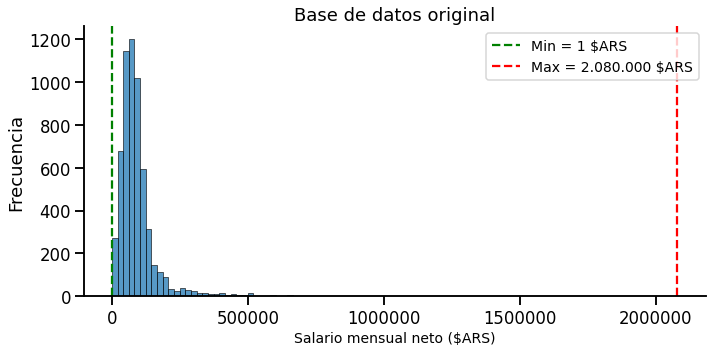

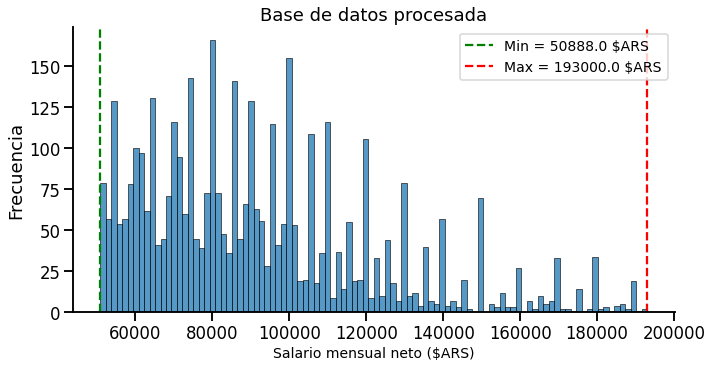

In [ ]:
# Comparación gráfica de las bases de datos

g=sns.displot(df[salary_COL], aspect=2, bins=100) 
g.refline(x=df[salary_COL].min(), color='green', linestyle='--', label="Min = 1 $ARS")
g.refline(x=df[salary_COL].max(), color='red', linestyle='--', label="Max = 2.080.000 $ARS")
plt.legend(loc='upper right', fontsize = 14)
plt.ticklabel_format(style='plain')
plt.ylabel("Frecuencia")
plt.xlabel('Salario mensual neto ($ARS)', fontsize=14)
plt.title("Base de datos original")
plt.tight_layout()

m=sns.displot(df2[salary_COL], aspect=2, bins=100) 
m.refline(x=df2[salary_COL].min(), color='green', linestyle='--', label="Min = {} $ARS".format(str(df2[salary_COL].min())))
m.refline(x=df2[salary_COL].max(), color='red', linestyle='--', label="Max = {} $ARS".format(str(df2[salary_COL].max())))
plt.legend(loc='upper right', fontsize = 14)
plt.ticklabel_format(style='plain')
plt.ylabel("Frecuencia")
plt.xlabel('Salario mensual neto ($ARS)',fontsize=14)
plt.title("Base de datos procesada")

### Conteo de frecuencias de los lenguajes de programación

La columna que contiene información sobre los lenguajes de programación utilizados es `tools_programming_languages`. Sus valores son strings con los lenguajes seleccionados separados por comas.



In [ ]:
df2.tools_programming_languages[:5]

0                             HTML, Javascript, Python
1                                              Ninguno
2    Bash/Shell, C, CSS, HTML, Java, Javascript, PH...
3               CSS, HTML, Javascript, SQL, TypeScript
4                                           Javascript
Name: tools_programming_languages, dtype: object

Las siguientes celdas de código separan estos lenguajes de programación y cuentan la frecuencia con la que aparecen.

No es necesario entender este código en profundidad, aunque sí es un buen ejercicio.

In [ ]:
relevant_columns = ['tools_programming_languages', 'salary_monthly_NETO', 'salary_monthly_BRUTO']

df3 = df2.copy()
df3 = df3[relevant_columns]
# Convert the comma-separated string of languages to a list of string.
# Remove 'ninguno de los anteriores' option, spaces and training commas.
def split_languages(languages_str):
  if not isinstance(languages_str, str):
    return []
  # Remove 'other' option
  languages_str = languages_str.lower()\
    .replace('ninguno de los anteriores', '')
  # Split string into list of items
  # Remove spaces and commas for each item
  return [lang.strip().replace(',', '')
          for lang in languages_str.split()]

# Create a new column with the list of languages
df3.loc[:, 'cured_programming_languages'] = df3.tools_programming_languages\
    .apply(split_languages)
if 'cured_programming_languages' not in relevant_columns:
    relevant_columns.append('cured_programming_languages') 

# Duplicate each row of df for each programming language
# mentioned in the response.
# We only include in df_lang the columns we are going to analyze later, so we
# don't duplicate innecesary information.
df_lang = df3.cured_programming_languages\
    .apply(pd.Series).stack()\
    .reset_index(level=-1, drop=True).to_frame()\
    .join(df3[relevant_columns])\
    .rename(columns={0: 'programming_language'})
# Horrible programming style! But a lot of data science code can be written with
# as concatenations of functions (pipelines), and there's no elegant way of
# doing that on Python.
df_lang[:5]

,programming_language,tools_programming_languages,salary_monthly_NETO,salary_monthly_BRUTO,cured_programming_languages
0,html,"HTML, Javascript, Python",63000.0,79000.0,"[html, javascript, python]"
0,javascript,"HTML, Javascript, Python",63000.0,79000.0,"[html, javascript, python]"
0,python,"HTML, Javascript, Python",63000.0,79000.0,"[html, javascript, python]"
1,ninguno,Ninguno,127000.0,160000.0,[ninguno]
2,bash/shell,"Bash/Shell, C, CSS, HTML, Java, Javascript, PH...",102000.0,130000.0,"[bash/shell, c, css, html, java, javascript, p..."


In [ ]:
df_lang = df_lang.reset_index(drop=True)
df_lang[:5]

,programming_language,tools_programming_languages,salary_monthly_NETO,salary_monthly_BRUTO,cured_programming_languages
0,html,"HTML, Javascript, Python",63000.0,79000.0,"[html, javascript, python]"
1,javascript,"HTML, Javascript, Python",63000.0,79000.0,"[html, javascript, python]"
2,python,"HTML, Javascript, Python",63000.0,79000.0,"[html, javascript, python]"
3,ninguno,Ninguno,127000.0,160000.0,[ninguno]
4,bash/shell,"Bash/Shell, C, CSS, HTML, Java, Javascript, PH...",102000.0,130000.0,"[bash/shell, c, css, html, java, javascript, p..."


En la columna `programming_language` se encuentra cada lenguaje por separado. Notar que si una respuesta contenía 3 lenguajes, como `"HTML, Javascript, Python"`, la fila ha sido replicada 3 veces. Por ello, hay tres filas con índice 1.

In [ ]:
language_count = df_lang.programming_language.value_counts()\
    .reset_index()\
    .rename(columns={'index': 'language', 'programming_language': 'frequency'})


for i, row in enumerate(language_count.itertuples(), 1):
  print(row)

Pandas(Index=0, language='javascript', frequency=1624)
Pandas(Index=1, language='sql', frequency=1469)
Pandas(Index=2, language='html', frequency=1199)
Pandas(Index=3, language='python', frequency=1064)
Pandas(Index=4, language='java', frequency=1051)
Pandas(Index=5, language='css', frequency=796)
Pandas(Index=6, language='bash/shell', frequency=726)
Pandas(Index=7, language='php', frequency=567)
Pandas(Index=8, language='.net', frequency=562)
Pandas(Index=9, language='typescript', frequency=530)
Pandas(Index=10, language='c#', frequency=497)
Pandas(Index=11, language='ninguno', frequency=235)
Pandas(Index=12, language='go', frequency=217)
Pandas(Index=13, language='c++', frequency=170)
Pandas(Index=14, language='c', frequency=155)
Pandas(Index=15, language='vba', frequency=152)
Pandas(Index=16, language='kotlin', frequency=138)
Pandas(Index=17, language='groovy', frequency=120)
Pandas(Index=18, language='ruby', frequency=93)
Pandas(Index=19, language='scala', frequency=85)
Pandas(Inde

In [ ]:
def delete_rows_low_frequency(df, language_count):
  # Copy the dataframe, this way you make sure you don't modify the original dataframe
  df = df.copy()
  # Delete rows where the programming language is equal to "ninguno".
  df.drop(df.index[df["programming_language"] == "ninguno"], inplace = True)
  # Iterate de rows of dataframe
  for i, row in enumerate(language_count.itertuples(), 0):
    # If the frequency is less than 25, that row is removed. 
    if int(row.frequency) < 25:
      df.drop(df.index[df["programming_language"] == str(row.language)], inplace = True)
  df = df.reset_index(drop=True)
  return df

In [ ]:
df_lang = delete_rows_low_frequency(df_lang, language_count)

In [ ]:
language_count = df_lang.programming_language.value_counts()\
    .reset_index()\
    .rename(columns={'index': 'language', 'programming_language': 'frequency'})

In [ ]:
for i, row in enumerate(language_count.itertuples(), 1):
  print(row)

Pandas(Index=0, language='javascript', frequency=1624)
Pandas(Index=1, language='sql', frequency=1469)
Pandas(Index=2, language='html', frequency=1199)
Pandas(Index=3, language='python', frequency=1064)
Pandas(Index=4, language='java', frequency=1051)
Pandas(Index=5, language='css', frequency=796)
Pandas(Index=6, language='bash/shell', frequency=726)
Pandas(Index=7, language='php', frequency=567)
Pandas(Index=8, language='.net', frequency=562)
Pandas(Index=9, language='typescript', frequency=530)
Pandas(Index=10, language='c#', frequency=497)
Pandas(Index=11, language='go', frequency=217)
Pandas(Index=12, language='c++', frequency=170)
Pandas(Index=13, language='c', frequency=155)
Pandas(Index=14, language='vba', frequency=152)
Pandas(Index=15, language='kotlin', frequency=138)
Pandas(Index=16, language='groovy', frequency=120)
Pandas(Index=17, language='ruby', frequency=93)
Pandas(Index=18, language='scala', frequency=85)
Pandas(Index=19, language='swift', frequency=70)
Pandas(Index=2

In [ ]:
df_lang["salary_monthly_NETO"].describe().apply(lambda s: '{0:.2f}'.format(s))

count     11623.00
mean      94600.93
std       31621.70
min       50888.00
25%       70000.00
50%       89000.00
75%      110000.00
max      193000.00
Name: salary_monthly_NETO, dtype: object

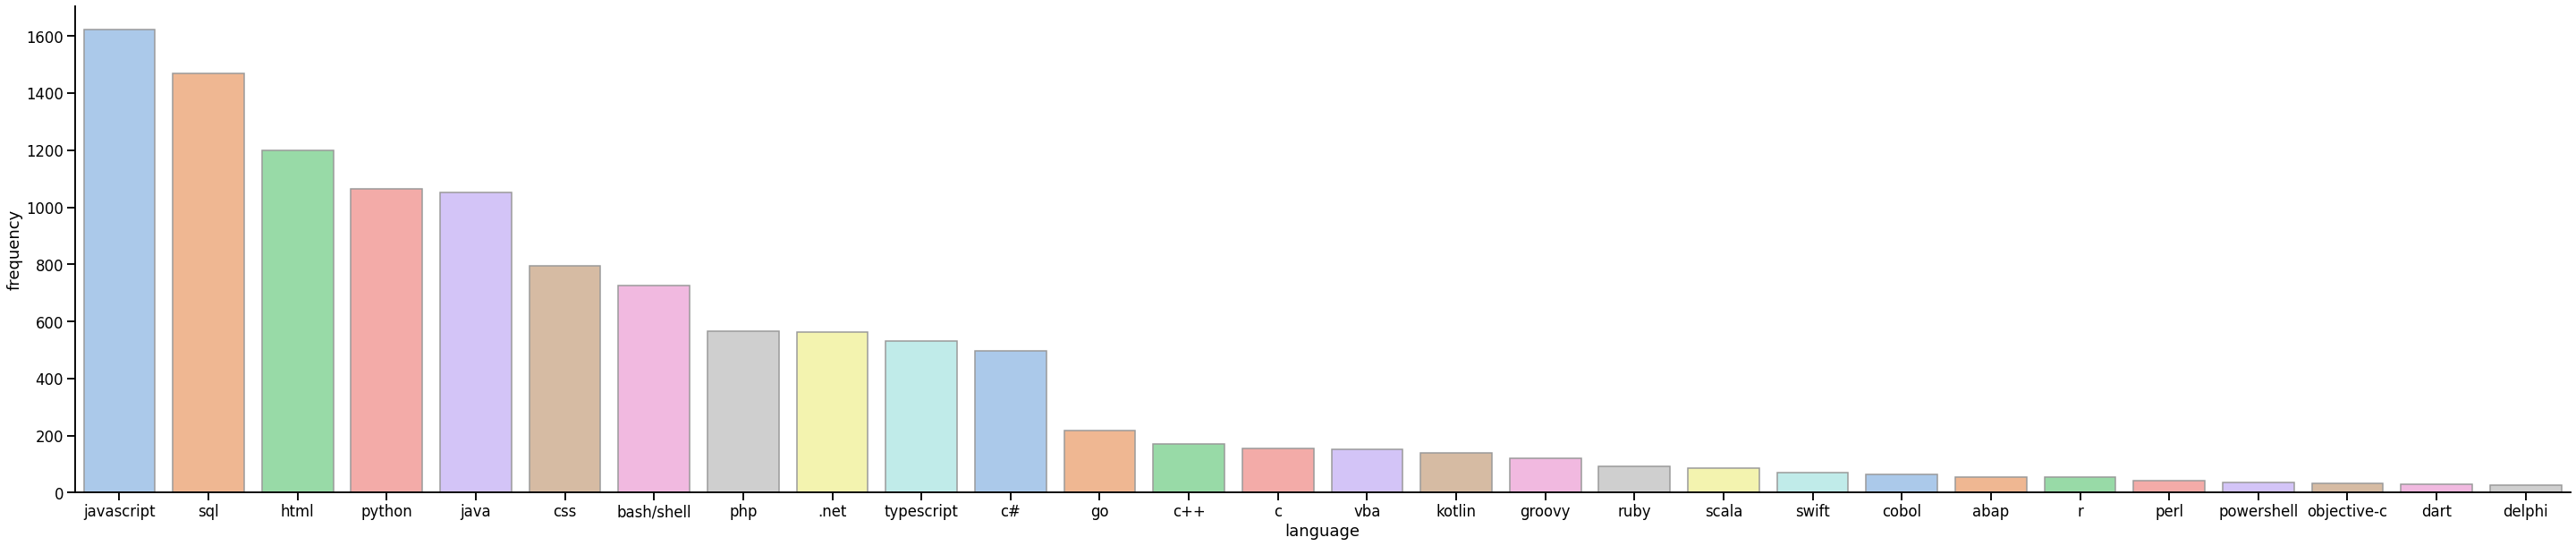

In [ ]:
plt.figure(figsize=(50,10))
sns.barplot(x="language", y="frequency" , palette="pastel", edgecolor=".6", data=language_count)
sns.despine()

In [ ]:
#def remove_rows_salary_min(df, salary_monthly_NETO):
  #df = df.copy()
  #df = df[df[salary_monthly_NETO] > 50854]
  #return df  

In [ ]:
#df_lang = remove_rows_salary_min(df_lang, "salary_monthly_NETO")
#df_lang["salary_monthly_NETO"].describe().apply(lambda s: '{0:.2f}'.format(s))

In [ ]:
#def remove_outlier(df_in, col_name):

  #q1 = df_in[col_name].quantile(0.25)
  #q3 = df_in[col_name].quantile(0.75)
  #iqr = q3 - q1 #Interquartile range
  #fence_low  = q1 - 1.5 * iqr
  #fence_high = q3 + 1.5 * iqr

  #df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]

  #return df_out

In [ ]:
#df_new = remove_outlier(df_lang, "salary_monthly_NETO")
#df_new = df_new.reset_index(drop=True)
#df_new

,programming_language,tools_programming_languages,salary_monthly_NETO,salary_monthly_BRUTO,cured_programming_languages
0,html,"HTML, Javascript, Python",63000.0,79000.0,"[html, javascript, python]"
1,javascript,"HTML, Javascript, Python",63000.0,79000.0,"[html, javascript, python]"
2,python,"HTML, Javascript, Python",63000.0,79000.0,"[html, javascript, python]"
3,bash/shell,"Bash/Shell, C, CSS, HTML, Java, Javascript, PH...",102000.0,130000.0,"[bash/shell, c, css, html, java, javascript, p..."
4,c,"Bash/Shell, C, CSS, HTML, Java, Javascript, PH...",102000.0,130000.0,"[bash/shell, c, css, html, java, javascript, p..."
...,...,...,...,...,...
11035,html,".NET, C#, COBOL, CSS, HTML, Javascript, PHP, S...",97000.0,99000.0,"[.net, c#, cobol, css, html, javascript, php, ..."
11036,javascript,".NET, C#, COBOL, CSS, HTML, Javascript, PHP, S...",97000.0,99000.0,"[.net, c#, cobol, css, html, javascript, php, ..."
11037,php,".NET, C#, COBOL, CSS, HTML, Javascript, PHP, S...",97000.0,99000.0,"[.net, c#, cobol, css, html, javascript, php, ..."
11038,sql,".NET, C#, COBOL, CSS, HTML, Javascript, PHP, S...",97000.0,99000.0,"[.net, c#, cobol, css, html, javascript, php, ..."


In [ ]:
#df_new["salary_monthly_NETO"].describe().apply(lambda s: '{0:.2f}'.format(s))

count     11040.00
mean      94906.29
std       32238.68
min       50888.00
25%       70000.00
50%       89000.00
75%      110000.00
max      199000.00
Name: salary_monthly_NETO, dtype: object

In [ ]:
#df_new

,programming_language,tools_programming_languages,salary_monthly_NETO,salary_monthly_BRUTO,cured_programming_languages
0,html,"HTML, Javascript, Python",63000.0,79000.0,"[html, javascript, python]"
1,javascript,"HTML, Javascript, Python",63000.0,79000.0,"[html, javascript, python]"
2,python,"HTML, Javascript, Python",63000.0,79000.0,"[html, javascript, python]"
3,bash/shell,"Bash/Shell, C, CSS, HTML, Java, Javascript, PH...",102000.0,130000.0,"[bash/shell, c, css, html, java, javascript, p..."
4,c,"Bash/Shell, C, CSS, HTML, Java, Javascript, PH...",102000.0,130000.0,"[bash/shell, c, css, html, java, javascript, p..."
...,...,...,...,...,...
11035,html,".NET, C#, COBOL, CSS, HTML, Javascript, PHP, S...",97000.0,99000.0,"[.net, c#, cobol, css, html, javascript, php, ..."
11036,javascript,".NET, C#, COBOL, CSS, HTML, Javascript, PHP, S...",97000.0,99000.0,"[.net, c#, cobol, css, html, javascript, php, ..."
11037,php,".NET, C#, COBOL, CSS, HTML, Javascript, PHP, S...",97000.0,99000.0,"[.net, c#, cobol, css, html, javascript, php, ..."
11038,sql,".NET, C#, COBOL, CSS, HTML, Javascript, PHP, S...",97000.0,99000.0,"[.net, c#, cobol, css, html, javascript, php, ..."


In [ ]:
df_lang.groupby('programming_language', as_index=False)['salary_monthly_NETO'].mean().sort_values(by=['salary_monthly_NETO'], ascending=False)


,programming_language,salary_monthly_NETO
23,scala,118289.470588
16,objective-c,117995.343750
15,kotlin,112330.726739
10,go,109683.860876
25,swift,108069.785714
11,groovy,105699.679833
8,dart,101931.034483
22,ruby,101363.282903
9,delphi,99907.166667
2,bash/shell,99181.599449


In [ ]:
df_lang.groupby('programming_language', as_index=False)['salary_monthly_NETO'].median().sort_values(by=['salary_monthly_NETO'], ascending=False)

,programming_language,salary_monthly_NETO
16,objective-c,114000.0
15,kotlin,110000.0
23,scala,110000.0
10,go,105000.0
11,groovy,100000.0
25,swift,100000.0
2,bash/shell,95000.0
6,cobol,95000.0
8,dart,95000.0
22,ruby,95000.0


In [ ]:
#def calculate_median(df, language):
  #median = float(df[df.programming_language == language]["salary_monthly_NETO"].median())
  #return median

#def calculate_mean(df, language): 
  #mean = float(df[df.programming_language == language]["salary_monthly_NETO"].mean())
  #return mean


#def add_median_mean_columns(df):
  #df = df.copy()
  #df = df.assign(median_salary_NETO='NAN')
  #df = df.assign(mean_salary_NETO='NAN')
  
  #for i, row in enumerate(df.itertuples(), 0):
    #df["median_salary_NETO"][i] = calculate_median(df, row.programming_language)
    #df["mean_salary_NETO"][i] = calculate_mean(df, row.programming_language)
  #return df 

In [ ]:
#df_new_2 = add_median_mean_columns(df_new)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
#df_new_2

,programming_language,tools_programming_languages,salary_monthly_NETO,salary_monthly_BRUTO,cured_programming_languages,median_salary_NETO,mean_salary_NETO
0,html,"HTML, Javascript, Python",63000.0,79000.0,"[html, javascript, python]",83000.0,90314.814403
1,javascript,"HTML, Javascript, Python",63000.0,79000.0,"[html, javascript, python]",87000.0,93375.930989
2,python,"HTML, Javascript, Python",63000.0,79000.0,"[html, javascript, python]",91660.0,97693.721186
3,bash/shell,"Bash/Shell, C, CSS, HTML, Java, Javascript, PH...",102000.0,130000.0,"[bash/shell, c, css, html, java, javascript, p...",95000.0,99212.081366
4,c,"Bash/Shell, C, CSS, HTML, Java, Javascript, PH...",102000.0,130000.0,"[bash/shell, c, css, html, java, javascript, p...",88000.0,92792.120163
...,...,...,...,...,...,...,...
11035,html,".NET, C#, COBOL, CSS, HTML, Javascript, PHP, S...",97000.0,99000.0,"[.net, c#, cobol, css, html, javascript, php, ...",83000.0,90314.814403
11036,javascript,".NET, C#, COBOL, CSS, HTML, Javascript, PHP, S...",97000.0,99000.0,"[.net, c#, cobol, css, html, javascript, php, ...",87000.0,93375.930989
11037,php,".NET, C#, COBOL, CSS, HTML, Javascript, PHP, S...",97000.0,99000.0,"[.net, c#, cobol, css, html, javascript, php, ...",85000.0,93606.571735
11038,sql,".NET, C#, COBOL, CSS, HTML, Javascript, PHP, S...",97000.0,99000.0,"[.net, c#, cobol, css, html, javascript, php, ...",86000.0,92091.098958


## Filtrado de lenguajes relevantes

El siguiente código permite seleccionar sólo las filas donde el valor de la columna `programming_language` se encuentre en la lista `interesting_languages`.

In [ ]:
# Filter out languages that we want to exclude
# Complete here with your selected list.
# interesting_languages = ["Python"]
interesting_languages = list(df_lang["programming_language"].value_counts().index)
filtered_df_lang = df_lang[df_lang.programming_language.isin(interesting_languages)]
filtered_df_lang = filtered_df_lang.reset_index(drop=True)
filtered_df_lang

,programming_language,tools_programming_languages,salary_monthly_NETO,salary_monthly_BRUTO,cured_programming_languages
0,html,"HTML, Javascript, Python",63000.0,79000.0,"[html, javascript, python]"
1,javascript,"HTML, Javascript, Python",63000.0,79000.0,"[html, javascript, python]"
2,python,"HTML, Javascript, Python",63000.0,79000.0,"[html, javascript, python]"
3,bash/shell,"Bash/Shell, C, CSS, HTML, Java, Javascript, PH...",102000.0,130000.0,"[bash/shell, c, css, html, java, javascript, p..."
4,c,"Bash/Shell, C, CSS, HTML, Java, Javascript, PH...",102000.0,130000.0,"[bash/shell, c, css, html, java, javascript, p..."
...,...,...,...,...,...
11618,html,".NET, C#, COBOL, CSS, HTML, Javascript, PHP, S...",97000.0,99000.0,"[.net, c#, cobol, css, html, javascript, php, ..."
11619,javascript,".NET, C#, COBOL, CSS, HTML, Javascript, PHP, S...",97000.0,99000.0,"[.net, c#, cobol, css, html, javascript, php, ..."
11620,php,".NET, C#, COBOL, CSS, HTML, Javascript, PHP, S...",97000.0,99000.0,"[.net, c#, cobol, css, html, javascript, php, ..."
11621,sql,".NET, C#, COBOL, CSS, HTML, Javascript, PHP, S...",97000.0,99000.0,"[.net, c#, cobol, css, html, javascript, php, ..."


In [ ]:
filtered_df_lang["salary_monthly_NETO"].describe()

count     11623.000000
mean      94600.931640
std       31621.696899
min       50888.000000
25%       70000.000000
50%       89000.000000
75%      110000.000000
max      193000.000000
Name: salary_monthly_NETO, dtype: float64

In [ ]:
ten_top_df_salary = filtered_df_lang.copy()
ten_top_df_salary = ten_top_df_salary[ten_top_df_salary.salary_monthly_NETO >= ten_top_df_salary.salary_monthly_NETO.quantile(0.90)]
ten_top_df_salary = ten_top_df_salary.reset_index(drop=True)
ten_top_df_salary



,programming_language,tools_programming_languages,salary_monthly_NETO,salary_monthly_BRUTO,cured_programming_languages
0,bash/shell,"Bash/Shell, Python",168000.0,268000.0,"[bash/shell, python]"
1,python,"Bash/Shell, Python",168000.0,268000.0,"[bash/shell, python]"
2,go,"Go, Java",168000.0,235500.0,"[go, java]"
3,java,"Go, Java",168000.0,235500.0,"[go, java]"
4,css,"CSS, HTML, Javascript, TypeScript",140000.0,140000.0,"[css, html, javascript, typescript]"
...,...,...,...,...,...
1249,bash/shell,"Bash/Shell, CSS, HTML, Javascript, TypeScript",157000.0,200000.0,"[bash/shell, css, html, javascript, typescript]"
1250,css,"Bash/Shell, CSS, HTML, Javascript, TypeScript",157000.0,200000.0,"[bash/shell, css, html, javascript, typescript]"
1251,html,"Bash/Shell, CSS, HTML, Javascript, TypeScript",157000.0,200000.0,"[bash/shell, css, html, javascript, typescript]"
1252,javascript,"Bash/Shell, CSS, HTML, Javascript, TypeScript",157000.0,200000.0,"[bash/shell, css, html, javascript, typescript]"


In [ ]:
ten_top_df_salary.programming_language.value_counts()

javascript     159
python         133
java           133
sql            122
html           107
bash/shell      97
css             68
php             66
typescript      61
.net            52
c#              37
go              37
kotlin          30
scala           27
groovy          19
ruby            16
c               15
swift           15
c++             14
objective-c     11
vba              8
r                6
cobol            6
delphi           5
dart             3
perl             3
abap             3
powershell       1
Name: programming_language, dtype: int64

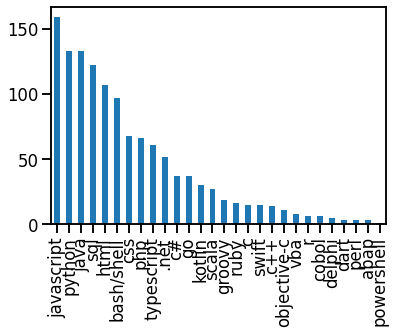

In [ ]:
ten_top_df_salary.programming_language.value_counts().plot(kind='bar')

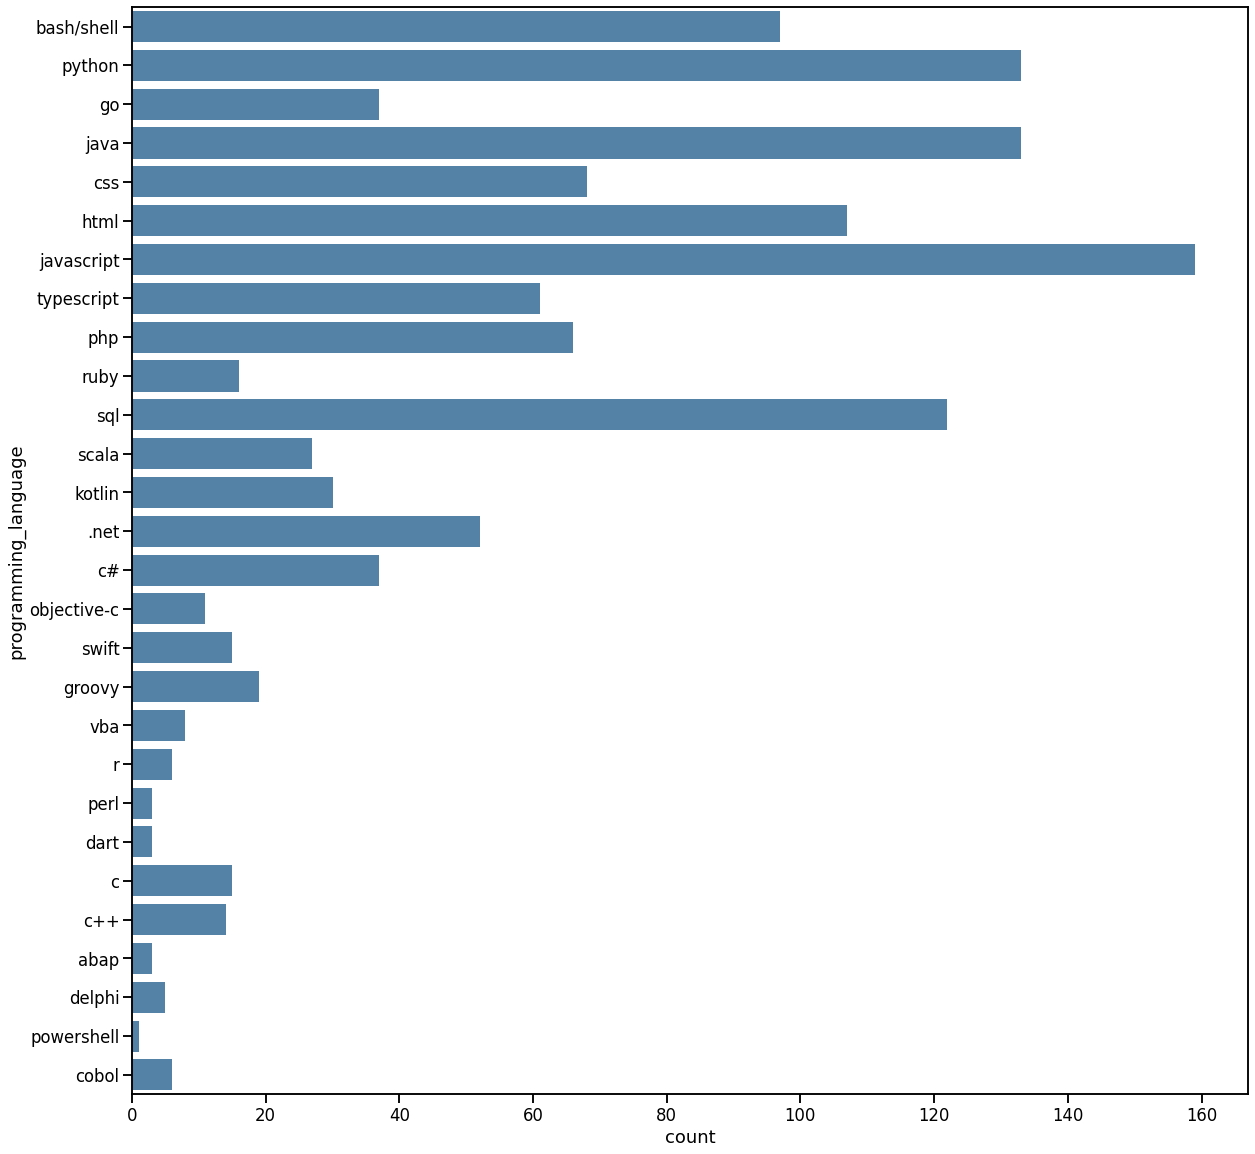

In [ ]:
fig = plt.figure(figsize=(20, 20))
sns.countplot(y=ten_top_df_salary.programming_language, color='steelblue')

In [ ]:
#sns.pairplot(data=filtered_df_lang, y_vars=['salary_monthly_BRUTO'],
                 #x_vars=['salary_monthly_NETO'],
                 #aspect=2, height=4)

#plt.xticks(rotation=20)

In [ ]:
salary_mean = filtered_df_lang.salary_monthly_NETO.mean()
print("A continuación se lista el porcentaje de personas que ganan más de: {} $ARS (media)".format('%.1f'%salary_mean))
for language in interesting_languages:
    specific_lang_df = filtered_df_lang[filtered_df_lang.programming_language == language]
    specific_lang_and_higher_mean = specific_lang_df[specific_lang_df.salary_monthly_NETO > salary_mean]
    print("El {}% de las personas que programan en {} ganan más de la media".format('%.1f'% ((len(specific_lang_and_higher_mean)/len(specific_lang_df))*100), 
                                                                                    language))

A continuación se lista el porcentaje de personas que ganan más de: 94600.9 $ARS (media)
El 40.9% de las personas que programan en javascript ganan más de la media
El 40.2% de las personas que programan en sql ganan más de la media
El 36.0% de las personas que programan en html ganan más de la media
El 47.6% de las personas que programan en python ganan más de la media
El 49.1% de las personas que programan en java ganan más de la media
El 37.6% de las personas que programan en css ganan más de la media
El 50.6% de las personas que programan en bash/shell ganan más de la media
El 40.0% de las personas que programan en php ganan más de la media
El 37.9% de las personas que programan en .net ganan más de la media
El 45.1% de las personas que programan en typescript ganan más de la media
El 36.2% de las personas que programan en c# ganan más de la media
El 65.9% de las personas que programan en go ganan más de la media
El 41.2% de las personas que programan en c++ ganan más de la media
El

# Análisis del impacto del lenguaje de programación

**¿Dado que lenguaje es probable en un X% que cobre más de 100k?**

In [ ]:
salary_cien = 100000
print("A continuación se lista el porcentaje de personas que ganan más de: 100000 $ARS")
list_prints = []
cadena = "El {}% de las personas que programan en {} ganan más de 100000 $ARS"
for language in interesting_languages:
    specific_lang_df = filtered_df_lang[filtered_df_lang.programming_language == language]
    specific_lang_and_higher_mean = specific_lang_df[specific_lang_df.salary_monthly_NETO > salary_cien]
    probabilidad = (len(specific_lang_and_higher_mean)/len(specific_lang_df)) * 100
    list_prints.append((probabilidad, language))

list_prints = sorted(list_prints, key=lambda tup: tup[0], reverse=True)

for p in list_prints:
  print(cadena.format('%.2f'% p[0], p[1]))

A continuación se lista el porcentaje de personas que ganan más de: 100000 $ARS
El 62.50% de las personas que programan en objective-c ganan más de 100000 $ARS
El 60.00% de las personas que programan en scala ganan más de 100000 $ARS
El 58.70% de las personas que programan en kotlin ganan más de 100000 $ARS
El 53.92% de las personas que programan en go ganan más de 100000 $ARS
El 48.57% de las personas que programan en swift ganan más de 100000 $ARS
El 45.83% de las personas que programan en groovy ganan más de 100000 $ARS
El 44.83% de las personas que programan en dart ganan más de 100000 $ARS
El 43.01% de las personas que programan en ruby ganan más de 100000 $ARS
El 41.27% de las personas que programan en cobol ganan más de 100000 $ARS
El 40.74% de las personas que programan en delphi ganan más de 100000 $ARS
El 39.77% de las personas que programan en java ganan más de 100000 $ARS
El 39.53% de las personas que programan en bash/shell ganan más de 100000 $ARS
El 36.84% de las persona

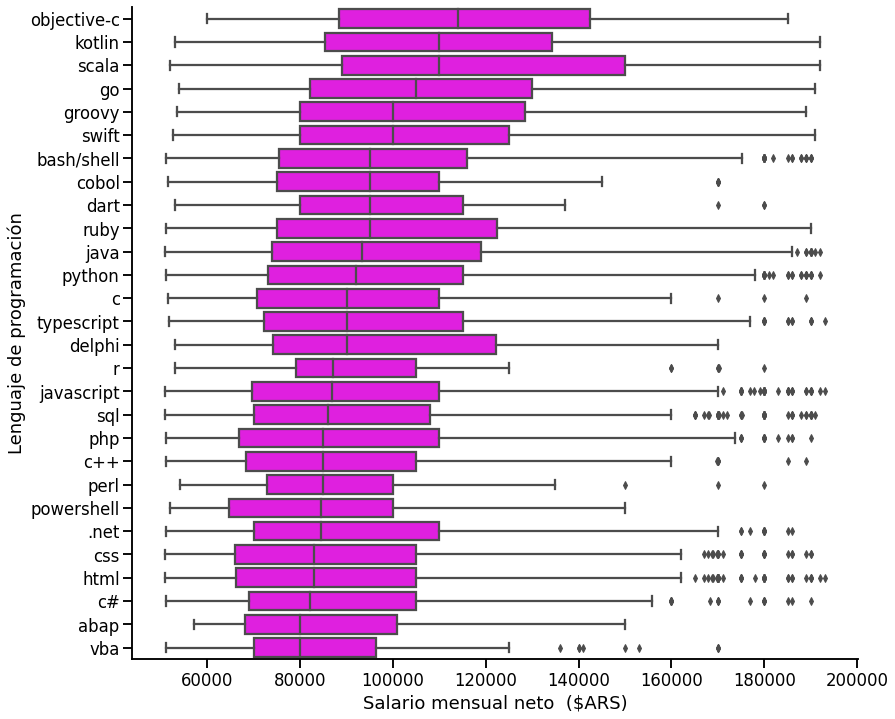

In [ ]:
# Graficamos la distribución de los salarios para lenguaje de programación
order = filtered_df_lang.groupby('programming_language')[salary_COL].median().sort_values(ascending=False).index #Esto es para que el gráfico ordene por medianas
plt.figure(figsize=(13, 12))
sns.boxplot(data=filtered_df_lang, x=salary_COL, y='programming_language',
                color='magenta', order= order)
plt.ticklabel_format(style='plain', axis='x')
plt.xlabel("Salario mensual neto  ($ARS)")
plt.ylabel("Lenguaje de programación")
sns.despine()

La gráfica boxplot precedente, ordena los lenguajes de programación en forma decreciente por su mediana, y describe las respectivas distribuciones de salarios. Los bigotes ubicados a la derecha, marcan los valores correspondientes a 1,5 intercuartiles por encima del percentil 75, dejando a la derecha una importante cantidad de valores atípicos.

# Conclusiones sobre el análisis de los lenguajes de programación

Los análisis precedentes revelan que aquellos que utilizan el lenguaje de programación "Objective-C", son los que tienen mayor probabilidad (62,5%) de ganar un salario por encima de 100000 $ARS. En segundo (60,3%) y tercer (58,7%) puesto se encuentran aquellos que programan con Kotlin y Scala respectivamente. Por otra parte, es interesante observar en la gráfica que, independientemente del lenguaje de programación utilizado, una importante cantidad de programadores logran pactar salarios muy por encima de la media (outliers).

# Ejercicio 2 - Densidades y varias variables

Responder a la pregunta general: **¿Que herramientas (prácticas y teóricas) són útiles para explorar la base, descubrir patrones, asociaciones?**

Para ello considere (igual al ejercicio Anterior):
1. Seleccionar las columnas relevantes para analizar.
2. Seleccionar las filas relevantes para analizar. Esto incluye la eliminación de valores extremos y erróneos, pero también puede enfocar el análisis en sub-poblaciones. 

# Análisis de densidad conjunta, asociación, densidad condicional y densidad conjunta condicional.

Para estos análisis se contemplan el resto de las variables explicativas consideradas inicialmente:

- Nivel de estudios: 'profile_studies_level'. Tipo: categórica

- Años de experiencia: 'profile_years_experience'. Tipo: cuantitativa

- Rol de trabajo: 'work_role'. Tipo: categórica

## a) Densidad conjunta

Que herramientas visuales y modelos puede utilizar para estudiar la distribución y comportamiento de sus datos? 

Elija tres variables numéricas y 2 variables categóricas. Visualice la base según varias de las variables elegidas. Puede describir de alguna forma el comportamiento de sus datos? Que herramientas utilizaría? Describa




La densidad conjunta es la distribución de probabilidad que forman dos o más variables aleatorias cuando sus realizaciones se producen simultáneamente. Dicho de otro modo, la densidad o probabilidad conjunta es una medida estadística que indica la probabilidad de que dos sucesos ocurran al mismo tiempo.

Para el caso de nuestra base de datos, analizaremos la probabilidad conjunta del género y el nivel de estudio mediante una tabla de contingencia.

In [ ]:
df2.profile_studies_level.value_counts()

Universitario    2820
Terciario         728
Secundario        254
Posgrado          250
Doctorado          16
Posdoctorado        2
Primario            2
Name: profile_studies_level, dtype: int64

In [ ]:
## Obtención de tabla de contingencia

pd.crosstab(index=df2.profile_gender, columns=df2.profile_studies_level, margins=True, margins_name= "Subtotal")

profile_studies_level,Doctorado,Posdoctorado,Posgrado,Primario,Secundario,Terciario,Universitario,Subtotal
profile_gender,,,,,,,,
Hombre,11,2,187,2,238,640,2386,3466
Mujer,5,0,62,0,15,85,424,591
Otros,0,0,1,0,1,3,10,15
Subtotal,16,2,250,2,254,728,2820,4072


In [ ]:
#Cálculo de probabilidad conjunta
pd.crosstab(index=df2.profile_gender, 
            columns=df2.profile_studies_level).apply(lambda r: r/len(df2) *100,
                                              axis=1) 

profile_studies_level,Doctorado,Posdoctorado,Posgrado,Primario,Secundario,Terciario,Universitario
profile_gender,,,,,,,
Hombre,0.270138,0.049116,4.592338,0.049116,5.844794,15.717092,58.595285
Mujer,0.122790,0.000000,1.522593,0.000000,0.368369,2.087426,10.412574
Otros,0.000000,0.000000,0.024558,0.000000,0.024558,0.073674,0.245580


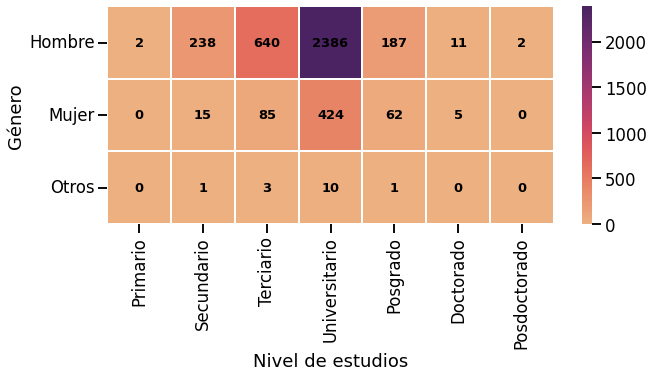

In [ ]:
# Mapa de calor para representar la tabla de contingencia anterior 
sorted_studies_levels = ['Primario', 'Secundario', 'Terciario', 'Universitario',
                         'Posgrado', 'Doctorado', 'Posdoctorado']
fig = plt.figure(figsize=(10,4))
exp = pd.crosstab(df2.profile_gender,
                  df2.profile_studies_level)[sorted_studies_levels]
sns.heatmap(exp, annot=True,linewidths = .9, fmt='g', cmap = 'flare',
            annot_kws={'size':13,'weight':'bold','color':'black'})
plt.xticks(rotation=90)
plt.xlabel("Nivel de estudios")
plt.yticks(rotation=0)
plt.ylabel("Género");


Conclusión: Mediante el mapa de calor es posible observar que la mayor cantidad de personas con estudios universitarios y de posgrado corresponden al género Hombre. En la tabla de probabilidades conjuntas se oberva que:

- Probabilidad de que una mujer tenga estudios universitarios: 10,31%
- Probabilidad de que un hombre tenga estudios universitarios: 58,67%
- Probabilidad de que una mujer tenga estudios de posgrado: 1,52%
- Probabilidad de que un hombre tenga estudios de posgrado: 4,52%

In [ ]:
df2.groupby(["profile_gender", "profile_studies_level"])[salary_COL].agg(['mean', 'std']).reset_index()

,profile_gender,profile_studies_level,mean,std
0,Hombre,Doctorado,95409.090909,19262.422202
1,Hombre,Posdoctorado,98500.000000,16263.455967
2,Hombre,Posgrado,108144.315508,34609.910885
3,Hombre,Primario,87500.000000,45961.940777
4,Hombre,Secundario,88762.861050,29418.138794
5,Hombre,Terciario,88687.483250,30108.784344
6,Hombre,Universitario,94175.359132,30328.472786
7,Mujer,Doctorado,66194.856000,14220.483758
8,Mujer,Posdoctorado,NaN,NaN
9,Mujer,Posgrado,95627.659032,26349.070917


In [ ]:
df_salary_gen = df2.copy()
df_salary_gen = df_salary_gen.groupby(["profile_gender", "profile_studies_level"])[salary_COL].agg(['mean', 'std']).reset_index()
df_salary_gen

,profile_gender,profile_studies_level,mean,std
0,Hombre,Doctorado,95409.090909,19262.422202
1,Hombre,Posdoctorado,98500.000000,16263.455967
2,Hombre,Posgrado,108144.315508,34609.910885
3,Hombre,Primario,87500.000000,45961.940777
4,Hombre,Secundario,88762.861050,29418.138794
5,Hombre,Terciario,88687.483250,30108.784344
6,Hombre,Universitario,94175.359132,30328.472786
7,Mujer,Doctorado,66194.856000,14220.483758
8,Mujer,Posdoctorado,NaN,NaN
9,Mujer,Posgrado,95627.659032,26349.070917


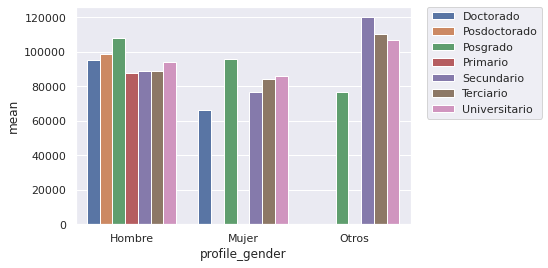

In [ ]:
sns.set(style="darkgrid")

sns.barplot(x="profile_gender", y="mean", hue="profile_studies_level", data=df_salary_gen)

# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

Se puede observar que en la muestra elegida, tanto en los géneros de hombre y mujer, se puede observar que los que poseen un posgrado son los que, en promedio, tienen un mejor salario. Mientras que los de género no binario poseen mayor predominancia en la categoría de secundario.

## b) Asociación

* Necesitamos decidir si sacar o no la columna de salario bruto. Para hacer la encuesta más simple.
¿Existe una correlación entre el salario bruto y el neto? Que abordaje y medidas usaría



La asociación es una medida que determina el grado de vinculación entre dos variables. Para variables cuantitativas, las medidas de asociación más utilizadas son la covarianza y el coeficiente de correlación de Pearson.

Aquí plantearemos una asociación de salario bruto y neto, y compararemos la base de datos original con la final.

In [ ]:
# Inicialmente hacemos un filtrado de la base de datos según diferentes criterios
# No utilizamos remoción por quartiles porque ya establecimos los límites mínimos y máximos al comienzo del documento

df_finalAsoc = df2[df2['salary_monthly_BRUTO'] <= 677000] # 677000 $ARS es el valor estimado del bruto máximo, considerando que el bruto es un 20% más que el neto.
df_finalAsoc = df_finalAsoc[df_finalAsoc['salary_monthly_BRUTO'] >= 67700] # 67700 $ARS es el valor estimado del bruto mínimo, considerando que el bruto es un 20% más que el neto.
df_finalAsoc = df_finalAsoc[df_finalAsoc['salary_monthly_NETO'].notna()] # Conservo filas sin valor NaN en columna de salario neto
df_finalAsoc = df_finalAsoc[df_finalAsoc['salary_monthly_BRUTO'].notna()] # Conservo filas sin valor NaN en columna de salario bruto
df_finalAsoc = df_finalAsoc[df_finalAsoc['salary_monthly_BRUTO'] >= df_finalAsoc['salary_monthly_NETO']] # Conservo filas donde el salario bruto es mayor 

In [ ]:
# Medidas de centralización
mediana_bruto = df_finalAsoc['salary_monthly_BRUTO'].median()
media_bruto = df_finalAsoc['salary_monthly_BRUTO'].mean()

mediana_neto = df_finalAsoc['salary_monthly_NETO'].median()
media_neto = df_finalAsoc['salary_monthly_NETO'].mean()

print(f"La mediana del salario bruto es {mediana_bruto} y la media es {media_bruto}")
print(f"La mediana del salario neto es {mediana_neto} y la media es {media_neto}")

La mediana del salario bruto es 115100.0 y la media es 126467.12779684094
La mediana del salario neto es 90000.0 y la media es 95731.32062363836


In [ ]:
# Medidas de asociación
import numpy as np 

matcov=np.cov(df_finalAsoc.salary_monthly_BRUTO,df_finalAsoc.salary_monthly_NETO)
print('matriz de varianza covarianza:','\n',matcov,'\n')

corrAsoc=np.corrcoef(df_finalAsoc.salary_monthly_BRUTO,df_finalAsoc.salary_monthly_NETO)
print('matriz de correlaciones: \n ', corrAsoc,'\n')

print('La correlación entra ambas variables para la base datos limpia es: ',corrAsoc[0,1],'\n')

matriz de varianza covarianza: 
 [[2.29018299e+09 1.31351948e+09]
 [1.31351948e+09 8.74299429e+08]] 

matriz de correlaciones: 
  [[1.         0.92826361]
 [0.92826361 1.        ]] 

La correlación entra ambas variables para la base datos limpia es:  0.9282636134062262 



In [ ]:
# Cálculo de correlación para la base de datos original
df_origAsoc = df[df['salary_monthly_NETO'].notna()] # Conservo filas sin valor NaN en columna de salario neto
df_origAsoc = df_origAsoc[df_origAsoc['salary_monthly_BRUTO'].notna()] # Conservo filas sin valor NaN en columna de salario bruto

corr=np.corrcoef(df_origAsoc.salary_monthly_BRUTO,df_origAsoc.salary_monthly_NETO)
print('matriz de correlaciones: \n ', corr,'\n')

print('La correlación entra ambas variables para la base datos original es: ',corr[0,1],'\n')

matriz de correlaciones: 
  [[1.         0.83333512]
 [0.83333512 1.        ]] 

La correlación entra ambas variables para la base datos original es:  0.8333351176300585 



In [ ]:
#Cálculo de la pendiente de la regresión
datos_x = df_finalAsoc[["salary_monthly_NETO"]]
x_train = np.array(datos_x)
y_train = df_finalAsoc['salary_monthly_BRUTO'].values

from sklearn import linear_model

regr = linear_model.LinearRegression()
regr.fit(x_train, y_train)
y_pred = regr.predict(x_train)
print("Pendiente de la regresión:", regr.coef_)

Pendiente de la regresión: [1.50236799]


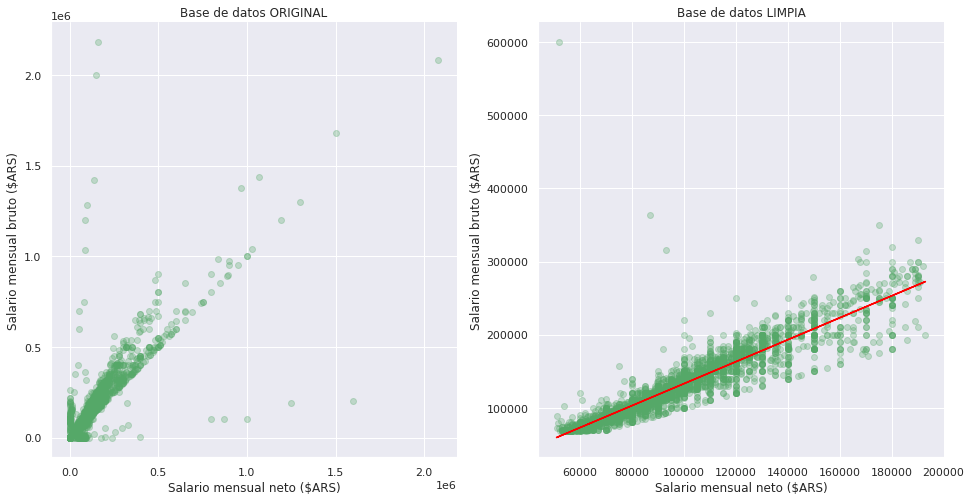

In [ ]:
# Gráfico la asociación de variables comparando bases de datos
fig, axes= plt.subplots(ncols=2, figsize=(16, 8))
plt.plot(x_train,y_pred, color='red')
g = sns.regplot(y=df_origAsoc['salary_monthly_BRUTO'],
                 x=df_origAsoc['salary_monthly_NETO'], scatter_kws={'alpha':0.3}, fit_reg=False, ax=axes[0], color='g')
g.set(xlabel="Salario mensual neto ($ARS)", ylabel= "Salario mensual bruto ($ARS)", title="Base de datos ORIGINAL")
m = sns.regplot(y=df_finalAsoc['salary_monthly_BRUTO'],
                 x=df_finalAsoc['salary_monthly_NETO'], scatter_kws={'alpha':0.3}, fit_reg=False, ax=axes[1], color='g')
m.set(xlabel="Salario mensual neto ($ARS)", ylabel= "Salario mensual bruto ($ARS)", title="Base de datos LIMPIA")

sns.despine()

Conclusión: La limpieza de la base de datos mejoró sustancialmente la correlación entre las variables salario neto y bruto (0.952) versus la base de datos original (0.833). El elemento fundamental fue la eliminación de valores de salario bruto mayores a 677.000 $ARS. Esta limpieza permitiría utilizar indistintamente ambas variables a fines analíticos sobre el resto de las variables explicativas. Sin embargo, el salario neto es una variable más práctica de uso ya que representa el salario efectivo que percibe el programador.

## c) Densidad condicional 

Estudie la distribución del salario según el nivel de estudio.

Separe la población según el nivel de estudio (elija dos subpoblaciones numerosas) y grafique de manera comparativa ambos histogramas de la variable `'salary_monthly_NETO'`
¿Considera que ambas variables son independientes?
¿Qué analizaría al respecto?

Calcule medidas de centralización y dispersión para cada subpoblación






La diferencia entre probabilidad conjunta y probabilidad condicional es que en la probabilidad conjunta, los dos eventos tienen que ocurrir al mismo tiempo, en cambio, la probabilidad condicional se refiere a la probabilidad de que suceda un evento si otro evento ya se ha cumplido.

Para el caso de nuestra base de datos, analizaremos la distribución del salario según el nivel de estudio. La pregunta que densidad condicional que buscaremos responder será ¿Cuál es la probabilidad de ganar un salario mayor a la media, dado que el nivel de estudios alcanzado es de secundario?

In [ ]:
# Observamos la frecuencia de cada nivel de estudio en la base de datos
df2["profile_studies_level"].value_counts()

Universitario    2820
Terciario         728
Secundario        254
Posgrado          250
Doctorado          16
Posdoctorado        2
Primario            2
Name: profile_studies_level, dtype: int64

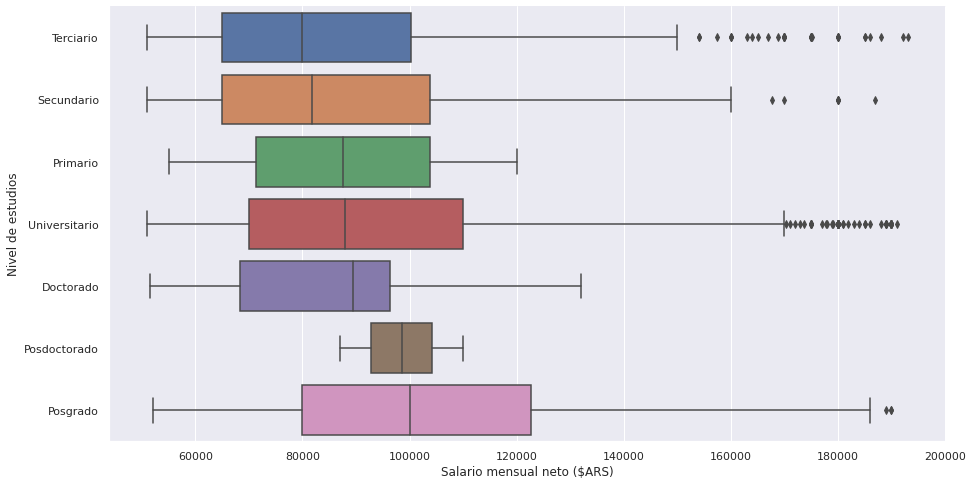

In [ ]:
# Mediante un boxplot, analizamos el salario según el nivel de estudio 
order = df2.groupby('profile_studies_level')[salary_COL].median().sort_values().index #Esto es para que el gráfico ordene por medianas

plt.figure(figsize=(15, 8))

g = sns.boxplot(data=df2, x='salary_monthly_NETO', 
                  y='profile_studies_level', order=order)

g.set(xlabel="Salario mensual neto ($ARS)", ylabel="Nivel de estudios")

sns.despine()

In [ ]:
# Finalmente realizamos los cálculos de la probabilidad que responde a la pregunta inicial de Densidad Condicional. 
# ¿Cuál es la probabilidad de ganar un salario mayor a la media, dado que el nivel de estudios alcanzado es de secundario?
df_sec = df2["profile_studies_level"] == "Secundario"
df_plusmedia = df2[salary_COL] > df2[salary_COL].mean()
prob_secplusmedia = len(df2[df_sec & df_plusmedia]) / len(df2[df2["profile_studies_level"] == "Secundario"])
print("La probabilidad de encontrar un programador que gane un sueldo mayor a la media, dado que alcanzó el nivel secundario, es de ", 
      str(prob_secplusmedia*100), " %")

La probabilidad de encontrar un programador que gane un sueldo mayor a la media, dado que alcanzó el nivel secundario, es de  34.645669291338585  %


Conclusión: Considerando la mediana, se observa un incremento esperable del salario en función del nivel de estudio. En cuanto al interrogante puntual, se encontró que entre los programadores que alcanzaron solo el nivel secundario, solo el 26 % recibe un salario mayor a la media.

# Probilidad Condicional

In [ ]:
avg_salary = df2[salary_COL].mean()
p_above_avg = len(df2[df2[salary_COL] >= avg_salary]) / len(df2)
p_above_avg

0.42387033398821217

## Probabilidad condicional

Ahora podemos pasar a hablar de la probabilidad condicional entre los dos eventos. La definimos como

$$P(A|B) = \frac{P(A \cap B)}{P(B)}$$

Esto es equivalente a:

$$P(A|B) = \frac{|A \cap B|}{|B|}$$

In [ ]:
# Create a dictionary
nivel_universitario = {
    "Primario": 0,
    "Secundario": 1,
    "Terciario": 2,
    "Universitario": 3,
    "Posgrado": 4, 
    "Doctorado": 5,
    "Posdoctorado": 6,
}

In [ ]:
df3 = df2.copy()
df3["profile_studies_level"] = df3["profile_studies_level"].apply(lambda x: int(nivel_universitario[x]))

df3["profile_studies_level"] = pd.to_numeric(df3["profile_studies_level"])

In [ ]:
df3.profile_studies_level[:5]

0    3
1    1
2    4
3    3
4    3
Name: profile_studies_level, dtype: int64

In [ ]:
# ¿Si uno tiene un título más haya de un terciario, la probabilidad de cobrar más que el promedio aumenta?
is_above_avg = df3[salary_COL] > avg_salary
study_level_greater_2 = df3['profile_studies_level'] > 2 # Universitario
intersection_count = len(df3[is_above_avg & study_level_greater_2])
p_condic_above_avg = len(df3[is_above_avg & study_level_greater_2])/len(df3[study_level_greater_2])
p_condic_above_avg 

0.4485103626943005

In [ ]:
# ¿Si uno tiene un título más haya de un universitario, la probabilidad de cobrar más que el promedio aumenta?
study_level_greater_3 = df3.profile_studies_level > 3 # Posgrado
intersection_count_2 = len(df3[is_above_avg & study_level_greater_3])
p_condic_above_avg_2 = len(df3[is_above_avg & study_level_greater_3])/len(df3[study_level_greater_3])
print(p_condic_above_avg_2)

0.5746268656716418


In [ ]:
# ¿Si uno tiene un título más haya de un posgrado, la probabilidad de cobrar más que el promedio aumenta? ¿Estos eventos, son independientes?
study_level_greater_4 = df3.profile_studies_level > 4 # Doctorado
intersection_count_3 = len(df3[is_above_avg & study_level_greater_4])
p_condic_above_avg_3 = len(df3[is_above_avg & study_level_greater_4])/len(df3[study_level_greater_4])
print(p_condic_above_avg_3)

0.4444444444444444


Se concluye que la probabilidad de ganar más que la media se da cuando se tiene al menos una especialización como título de posgrado.

## d) Densidad Conjunta condicional

Elija dos variables numéricas y una categórica. 
Estudie la dispersión (scatterplot) de las dos variables discriminando en color por la variable categórica (ayuda: hue en seaborn)


La densidad conjunta condicional, permite calcular la probabilidad conjunta de dos eventos, dado que ya ha sucedido un tercer evento.

Para el caso de nuestra base de datos, analizaremos la probabilidad de ganar un salario por encima de la media, teniendo menos de 2 años de experiencia. Esto se analizará solo sobre la categoría Data Scientist, lo cual representará la condición dada inicialmente.

In [ ]:
# Inicialmente inspeccionamos las variables cuantitativas
df2[["profile_years_experience", salary_COL]].describe()

,profile_years_experience,salary_monthly_NETO
count,4072.000000,4072.000000
mean,9.751621,92521.174052
std,7.023251,30448.199115
min,0.000000,50888.000000
25%,4.000000,70000.000000
50%,8.000000,86450.000000
75%,14.000000,110000.000000
max,115.000000,193000.000000


In [ ]:
# Dado que la variable años de experiencia tiene valores incorrectamente altos, se le realiza un filtrado mediante un corte de 50 años

experience_filtered = df2["profile_years_experience"][df2["profile_years_experience"] < 50]
experience_filtered.describe().apply(lambda s: '{0:.2f}'.format(s))

count    4071.00
mean        9.73
std         6.83
min         0.00
25%         4.00
50%         8.00
75%        14.00
max        44.00
Name: profile_years_experience, dtype: object

In [ ]:
# Inspeccionamos la variable categórica rol de trabajo

df2["work_role"].unique()
df2["work_role"].value_counts().head(15)

# Dada la gran cantidad de roles distintos, seleccionamos aquellos de interés

interest_roles = ["Data Scientist / Data Engineer", "Developer"]
df_interest_roles = df2[df2['work_role'].isin(interest_roles)]["work_role"]

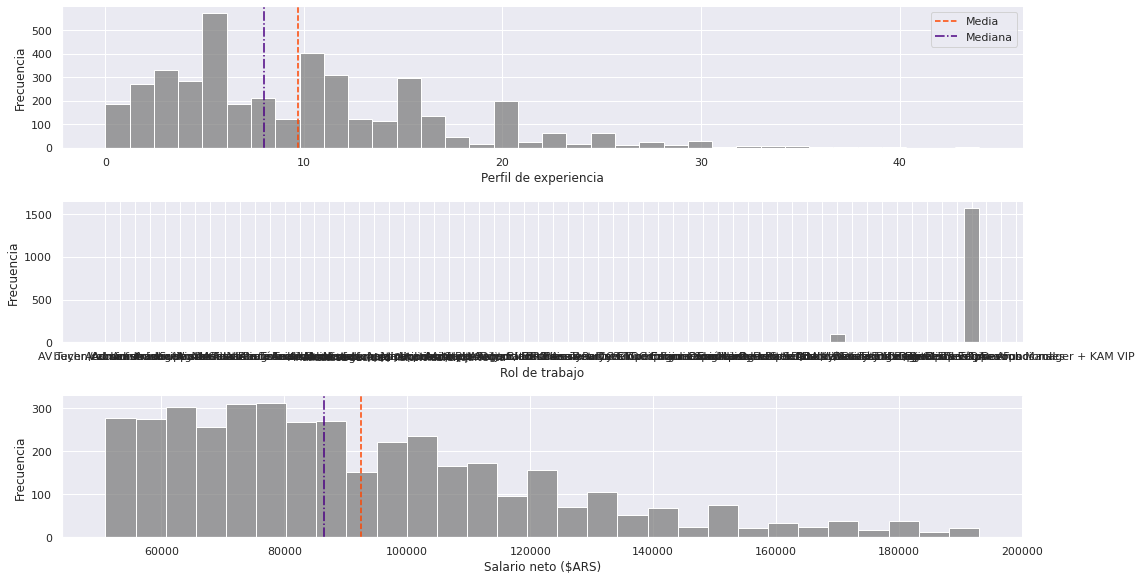

In [ ]:
# Visualizamos la frecuencia de las variables

fig, axes = plt.subplots(nrows=3, figsize=(16, 8))
plt.tight_layout() # Este comando hace que no se encimen los gráficos y se puedan ver las etiquetas del eje x. Cabe aclarar  que las etiquetas se agregan automáticamente
g =sns.histplot(experience_filtered, ax=axes[0], color='gray')
axes[0].axvline(experience_filtered.mean(), color='orangered',
            linestyle='--', label='Media')
axes[0].axvline(experience_filtered.median(), color='indigo',
            linestyle='-.', label='Mediana')
g.set(xlabel="Perfil de experiencia", ylabel="Frecuencia")

r = sns.histplot(df_interest_roles, ax=axes[1], color='gray')
r.set(xlabel="Rol de trabajo", ylabel="Frecuencia")
plt.tight_layout()

m = sns.histplot(df2["salary_monthly_NETO"], ax=axes[2], color='gray')
m.set(xlabel="Salario neto ($ARS)", ylabel="Frecuencia")
axes[2].axvline(df2["salary_monthly_NETO"].mean(), color='orangered',
            linestyle='--', label='Media')
axes[2].axvline(df2["salary_monthly_NETO"].median(), color='indigo',
            linestyle='-.', label='Mediana')

axes[0].legend()

sns.despine()

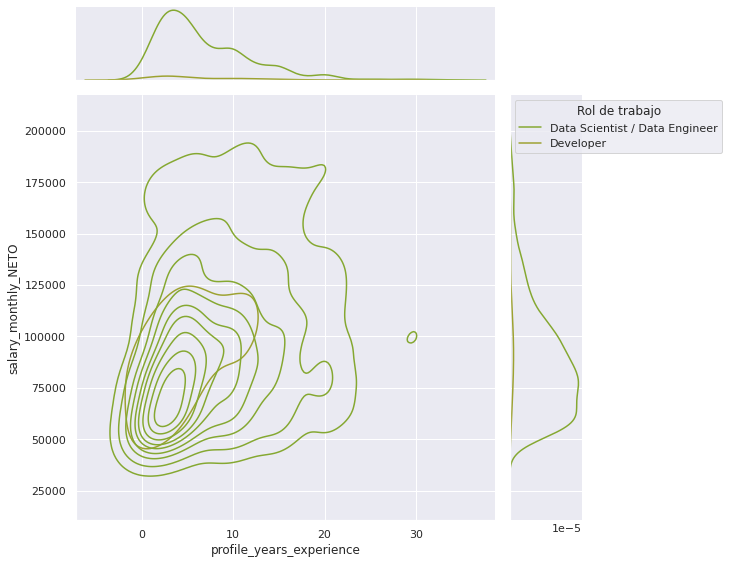

In [ ]:
# Visualizamos la distribución de los datos bajo las 3 variables involucradas: Salario neto, Experiencia y Roles de trabajo de interés
ax = sns.jointplot(x=experience_filtered,
                  y=df2[salary_COL], hue=df_interest_roles,
                  kind='kde', height=8, legend=False)
plt.legend(labels = interest_roles, loc = 2, title= "Rol de trabajo")

In [ ]:
# Finalmente, calculamos la probabilidad que responde al interrogante inicial de Densidad Conjunta Condicional. 
# Probabilidad de ganar un salario por encima de la media teniendo menos de 2 años de experiencia y solo considerando los Data Scientists.

df_DataSci = df2['work_role'] == "Data Scientist / Data Engineer"
df_exp_2 = df2['profile_years_experience'] < 2
df_plusmedia = df2[salary_COL] > df2[salary_COL].mean()
# df_plusmedia ya estaba definido en un sección anterior

prob_Exp2_plusmedia_DatSci = len(df2[df_exp_2 & df_plusmedia & df_DataSci]) / len(df2[df2["work_role"] == "Data Scientist / Data Engineer"])
print("La probabilidad de encontrar un programador con menos de 2 años de experiencia, que gane un sueldo mayor a la media, dado que es Data Scientist, es de ", 
      str(prob_Exp2_plusmedia_DatSci*100), " %")

La probabilidad de encontrar un programador con menos de 2 años de experiencia, que gane un sueldo mayor a la media, dado que es Data Scientist, es de  0.0  %


Principales conclusiones:

La exploración de la base de datos 2020 de la encuesta sysarmy, mostró inicialmente la existencia de valores extremos atípicos, por lo que debío ser procesada bajo diferentes criterios de filtrado. La nueva base de datos revela que el salario promedio de programadores alcanzaba en el año 2020 los 110.284 $ARS. En cuanto a los lenguajes de programación más populares, se destaca "Go" con la mayor proporción de encuestados que cobra salarios por encima de la media. El análisis de probabilidad conjunta, revela una participación muy alta de hombres de nivel universitario entre los encuestados (59,5%), por sobre cualquier otra combinación de género y nivel de estudio. El análisis de asociación entre las variables de salario bruto y neto muestra una alta correlación (0.952) al eliminar valores atípicos extremadamente altos. Al analizar el salario de los programadores en función del nivel de estudio, se encuentra un aumento esperable del salario a medida que se incrementa el nivel de estudios. Por último, se realizó un análisis restringido solo a programadores dedicados a la ciencia de datos ("Data scientists"). Este revela la importancia de la experiencia para alcanzar salarios altos, ya que solo el 1% de estos encuestados logra salarios por encima de la media, cuando tiene menos de 2 años de experiencia.

Algunas recomendaciones para futuras encuestas

Las diferencias entre trabajadores "Part time" y "Full time" son interesantes para evaluar el impacto del tiempo de dedicación laboral sobre el salario. Sin embargo, estas características se encuentran comprendidas en una variable que incorpora otras características no comparables como "Trabajo remoto" o "Freelance". Se recomienda entonces la incorporación de una variable que exclusivamente consulte si un trabajador es "Part time" o "Full time". Por otra parte, la variable nivel de estudios, incorpora la categoría "Posgrado" a la par de otras como "Doctorado" y "Postdoctorado", lo cual es redundante e implica la separación innecesaria de categorías. Se recomienda eliminar la opción "Posgrado".

# Bibliografía:
Resultados de la Encuesta de salarios 2020. Link: https://sysarmy.com/blog/posts/resultados-de-la-encuesta-de-salarios-2020-2/

Canasta Básica Total Diciembre 2020. Fuente: INDEC (https://www.indec.gob.ar/ftp/cuadros/sociedad/serie_cba_cbt.xls)